In [61]:
# Importing the necessary libraries into the workspace
import numpy as np
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### **1. Implementing and Visualizing Activation Functions**

In [31]:
# Activation Functions

# Step Function
def step_function(x):
    return np.where(x >= 0, 1, 0)

# Sigmoid Function (Binary)
def sigmoid_binary(x):
    return 1 / (1 + np.exp(-x))

# Sigmoid Function (Bipolar)
def sigmoid_bipolar(x):
    return 2 / (1 + np.exp(-x)) - 1

# Tanh Function
def tanh_function(x):
    return np.tanh(x)

# ReLU Function
def relu_function(x):
    return np.maximum(0, x)

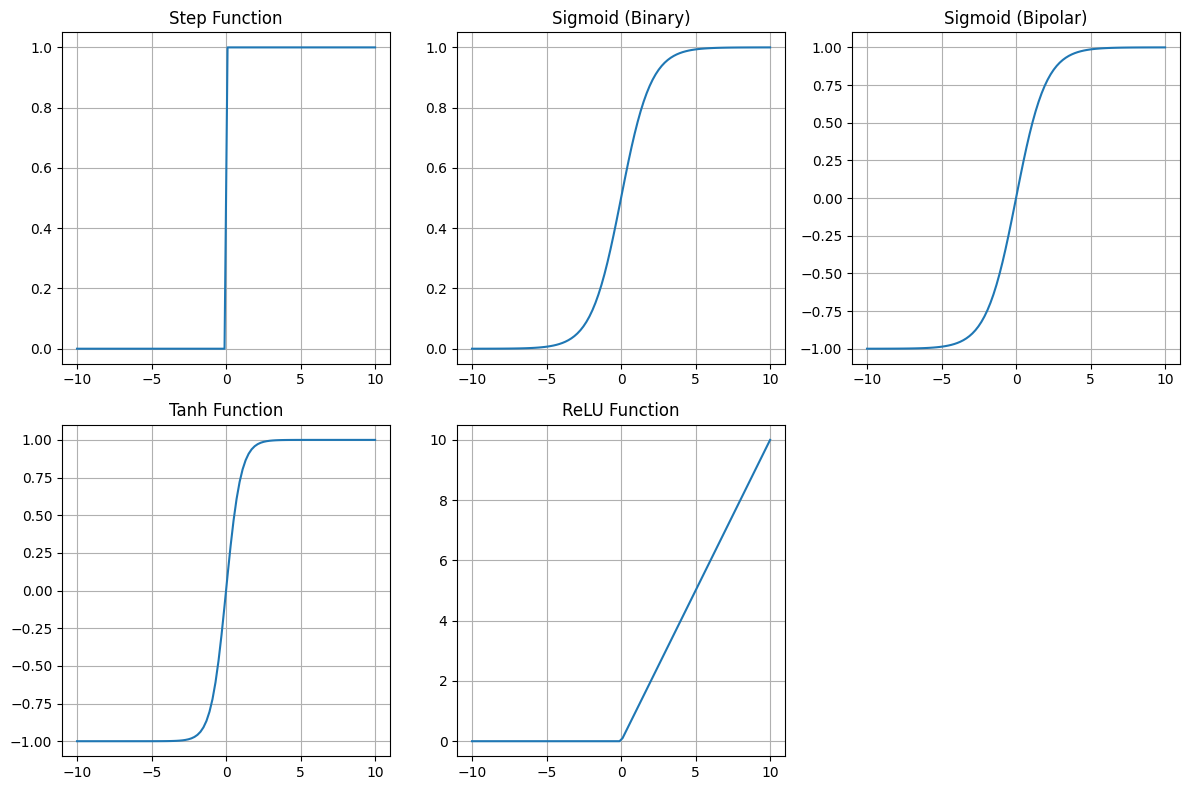

In [32]:
# Plotting the above functions
x_values = np.linspace(-10, 10, 100)

plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.plot(x_values, step_function(x_values), label='Step Function')
plt.title('Step Function')
plt.grid()

plt.subplot(2, 3, 2)
plt.plot(x_values, sigmoid_binary(x_values), label='Sigmoid (Binary)')
plt.title('Sigmoid (Binary)')
plt.grid()

plt.subplot(2, 3, 3)
plt.plot(x_values, sigmoid_bipolar(x_values), label='Sigmoid (Bipolar)')
plt.title('Sigmoid (Bipolar)')
plt.grid()

plt.subplot(2, 3, 4)
plt.plot(x_values, tanh_function(x_values), label='Tanh')
plt.title('Tanh Function')
plt.grid()

plt.subplot(2, 3, 5)
plt.plot(x_values, relu_function(x_values), label='ReLU')
plt.title('ReLU Function')
plt.grid()

plt.tight_layout()
plt.show()

### **Implementing a Simple Neural Network**

In [26]:
# Loading the dataset
data = pd.read_csv('heart.csv')

In [50]:
# Displaying the first few rows of the dataset to understand its structure
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


(   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
 0   63    1   3       145   233    1        0      150      0      2.3      0   
 1   37    1   2       130   250    0        1      187      0      3.5      0   
 2   41    0   1       130   204    0        0      172      0      1.4      2   
 3   56    1   1       120   236    0        1      178      0      0.8      2   
 4   57    0   0       120   354    0        1      163      1      0.6      2   
 
    ca  thal  target  
 0   0     1       1  
 1   0     2       1  
 2   0     2       1  
 3   0     2       1  
 4   0     2       1  ,
 None)

In [55]:
# Selecting a subset of features (using first 50 features)
features = data.columns[:50]
X = data[features]
y = data['target']

In [62]:
# Splitting data into testing and training sets of 80% and 20%, respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
# Defining the neural network creation function
def create_model(activation_function):
    model = Sequential([
        Dense(16, input_dim=X_train.shape[1], activation=activation_function),  # Hidden layer with more neurons
        Dense(1, activation='sigmoid')  # Output layer
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

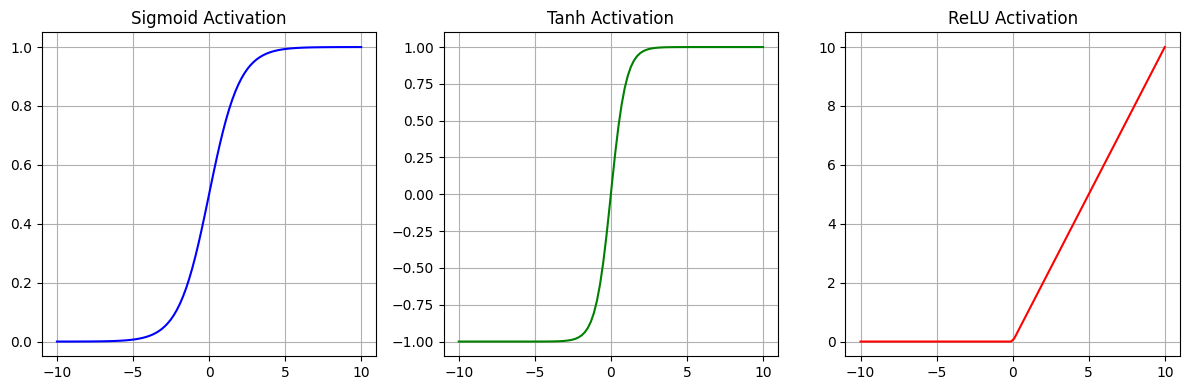

In [59]:
# Plotting the activation functions separately
x_values = np.linspace(-10, 10, 100)

def plot_activation_functions():
    plt.figure(figsize=(12, 4))

    # Sigmoid
    plt.subplot(1, 3, 1)
    plt.plot(x_values, 1 / (1 + np.exp(-x_values)), label='Sigmoid', color='blue')
    plt.title('Sigmoid Activation')
    plt.grid()

    # Tanh
    plt.subplot(1, 3, 2)
    plt.plot(x_values, np.tanh(x_values), label='Tanh', color='green')
    plt.title('Tanh Activation')
    plt.grid()

    # ReLU
    plt.subplot(1, 3, 3)
    plt.plot(x_values, np.maximum(0, x_values), label='ReLU', color='red')
    plt.title('ReLU Activation')
    plt.grid()

    plt.tight_layout()
    plt.show()

plot_activation_functions()

In [47]:
# Initialize an empty list to store the performance metrics
performance_metrics = []

# Train models and collect histories
activations = ['sigmoid', 'tanh', 'relu']

for activation in activations:
    print(f"\nTraining model with {activation} activation...")
    model = create_model(activation)
    history = model.fit(X_train, y_train, epochs=200, batch_size=8, verbose=0)

    # Making predictions
    predictions = (model.predict(X_test) > 0.5).astype("int32")

    # Calculating performance metrics and storing them in the list
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)

    performance_metrics.append([activation.capitalize(), accuracy, precision, recall, f1])

    # Displaying metrics for the current activation function
    print(f"\nPerformance Metrics for {activation} activation:")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")


Training model with sigmoid activation...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step

Performance Metrics for sigmoid activation:
Accuracy: 0.8361, Precision: 0.8929, Recall: 0.7812, F1-Score: 0.8333

Training model with tanh activation...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step

Performance Metrics for tanh activation:
Accuracy: 0.8197, Precision: 0.8621, Recall: 0.7812, F1-Score: 0.8197

Training model with relu activation...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step

Performance Metrics for relu activation:
Accuracy: 0.8689, Precision: 0.9286, Recall: 0.8125, F1-Score: 0.8667


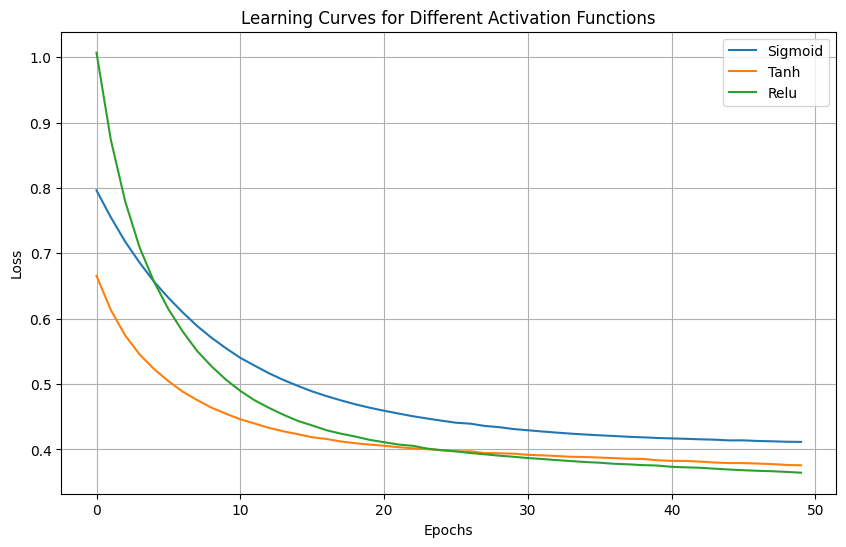

In [48]:
# Plotting the learning curves for different activations in one graph
plt.figure(figsize=(10, 6))
for activation in activations:
    plt.plot(histories[activation]['loss'], label=f'{activation.capitalize()}')
plt.title('Learning Curves for Different Activation Functions')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [49]:
# Displaying the final report
metrics_df = pd.DataFrame(performance_metrics, columns=['Activation Function', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

print("Final Prediction Report:")
print(metrics_df)

Final Prediction Report:
  Activation Function  Accuracy  Precision   Recall  F1-Score
0             Sigmoid  0.836066   0.892857  0.78125  0.833333
1                Tanh  0.819672   0.862069  0.78125  0.819672
2                Relu  0.868852   0.928571  0.81250  0.866667


#### **Inferences:**

1. **Accuracy**:
   - **ReLU**: Highest accuracy at **86.89%**.
   - **Sigmoid**: **83.61%** accuracy.
   - **Tanh**: Lowest accuracy at **81.97%**.

2. **Precision**:
   - **ReLU**: Best precision at **92.86%**.
   - **Sigmoid**: **89.29%** precision.
   - **Tanh**: Lower precision at **86.21%**.

3. **Recall**:
   - **Sigmoid** and **Tanh**: Same recall of **78.13%**.
   - **ReLU**: Higher recall at **81.25%**.

4. **F1-Score**:
   - **ReLU**: Best F1-score at **86.67%** (balance of precision and recall).
   - **Sigmoid**: Close with **83.33%** F1-score.
   - **Tanh**: Slightly lower at **81.97%**.

#### **Conclusion**:
- **ReLU** is the best performing activation function for this dataset, with the highest accuracy, precision, recall, and F1-score.
- **Sigmoid** offers a balanced performance but slightly lower than ReLU.
- **Tanh** has the lowest performance in all metrics.
